> This Notebook Starts from 2024/01/05
# Benchmarking
(64 waypoints)

## Pure Car

### MPPI
(a) clockwise (~10 rounds)
- data/data-20240105-193158
- data/data-20240105-193455

(b) counter-clockwise (~10 rounds)
- data/data-20240105-193808
- data/data-20240105-194127

### PID
(a) clockwise (~10 rounds)
- data/data-20240105-195120
- data/data-20240105-195435

(b) counter-clockwise (~10rounds)
- data/data-20240105-194503
- data/data-20240105-194725

## Harmmer Car

### MPPI
(a) clockwise
- (not working) data/data-20240105-202100
- (not working) data/data-20240105-202357
- (not working) data/data-20240105-202642

(b) counter clockwise
- (not working) data/data-20240105-201236
- data/data-20240105-201542
- (not working) data/data-20240105-201842


### PID
(a) clockwise 
- data/data-20240105-195939
- data/data-20240105-200310

(b) counter clockwise
- data/data-20240105-200656
- data/data-20240105-200926

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from offroad.utils import load_state
import seaborn as sns
from offroad import OFFROAD_DATA_DIR
from matplotlib.patches import Patch
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2

LOG_DIR = OFFROAD_DATA_DIR

In [3]:
data_list = [
                dict(controller='mppi', name='clock circle', dir='data-20240105-193158', range=[17, 182], disturbance='none'),
                dict(controller='mppi', name='clock circle', dir='data-20240105-193455', range=[17, 156], disturbance='none'),
                dict(controller='mppi', name='counterclock circle', dir='data-20240105-194503', range=[15, 201], disturbance='none'),
                dict(controller='mppi', name='counterclock circle', dir='data-20240105-194127', range=[15, 195], disturbance='none'),
                dict(controller='pid', name='clock circle', dir='data-20240105-195120', range=[10, 200], disturbance='none'),
                dict(controller='pid', name='clock circle', dir='data-20240105-195435', range=[10, 200], disturbance='none'),
                dict(controller='pid', name='counterclock circle', dir='data-20240105-194503', range=[10, 200], disturbance='none'),
                dict(controller='pid', name='counterclock circle', dir='data-20240105-194725', range=[10, 200], disturbance='none'),
                dict(controller='mppi', name='clock circle', dir='data-20240105-202100', range=[15, 130], disturbance='drag hammer'),
                dict(controller='mppi', name='clock circle', dir='data-20240105-202357', range=[15, 118], disturbance='drag hammer'),
                dict(controller='mppi', name='clock circle', dir='data-20240105-202642', range=[15, 118], disturbance='drag hammer'),
                dict(controller='mppi', name='counterclock circle', dir='data-20240105-201236', range=[10, 130], disturbance='drag hammer'),
                dict(controller='mppi', name='counterclock circle', dir='data-20240105-201542', range=[10, 200], disturbance='drag hammer'),
                dict(controller='mppi', name='counterclock circle', dir='data-20240105-201842', range=[10, 100], disturbance='drag hammer'),
                dict(controller='pid', name='clock circle', dir='data-20240105-195939', range=[10, 210], disturbance='drag hammer'),
                dict(controller='pid', name='clock circle', dir='data-20240105-200310', range=[10, 210], disturbance='drag hammer'),
                dict(controller='pid', name='counterclock circle', dir='data-20240105-200656', range=[20, 190], disturbance='drag hammer'),
                dict(controller='pid', name='counterclock circle', dir='data-20240105-200926', range=[20, 200], disturbance='drag hammer'),
]

## (Summary) Plot trajectory

Output()

Output()

[INFO] In total 165 logs


Output()

[INFO] In total 139 logs


Output()

[INFO] In total 186 logs


Output()

[INFO] In total 180 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 115 logs


Output()

[INFO] In total 103 logs


Output()

[INFO] In total 103 logs


[INFO] In total 120 logs


Output()

[INFO] In total 190 logs


Output()

Output()

[INFO] In total 90 logs


Output()

[INFO] In total 200 logs


Output()

[INFO] In total 200 logs


Output()

[INFO] In total 170 logs


[INFO] In total 180 logs


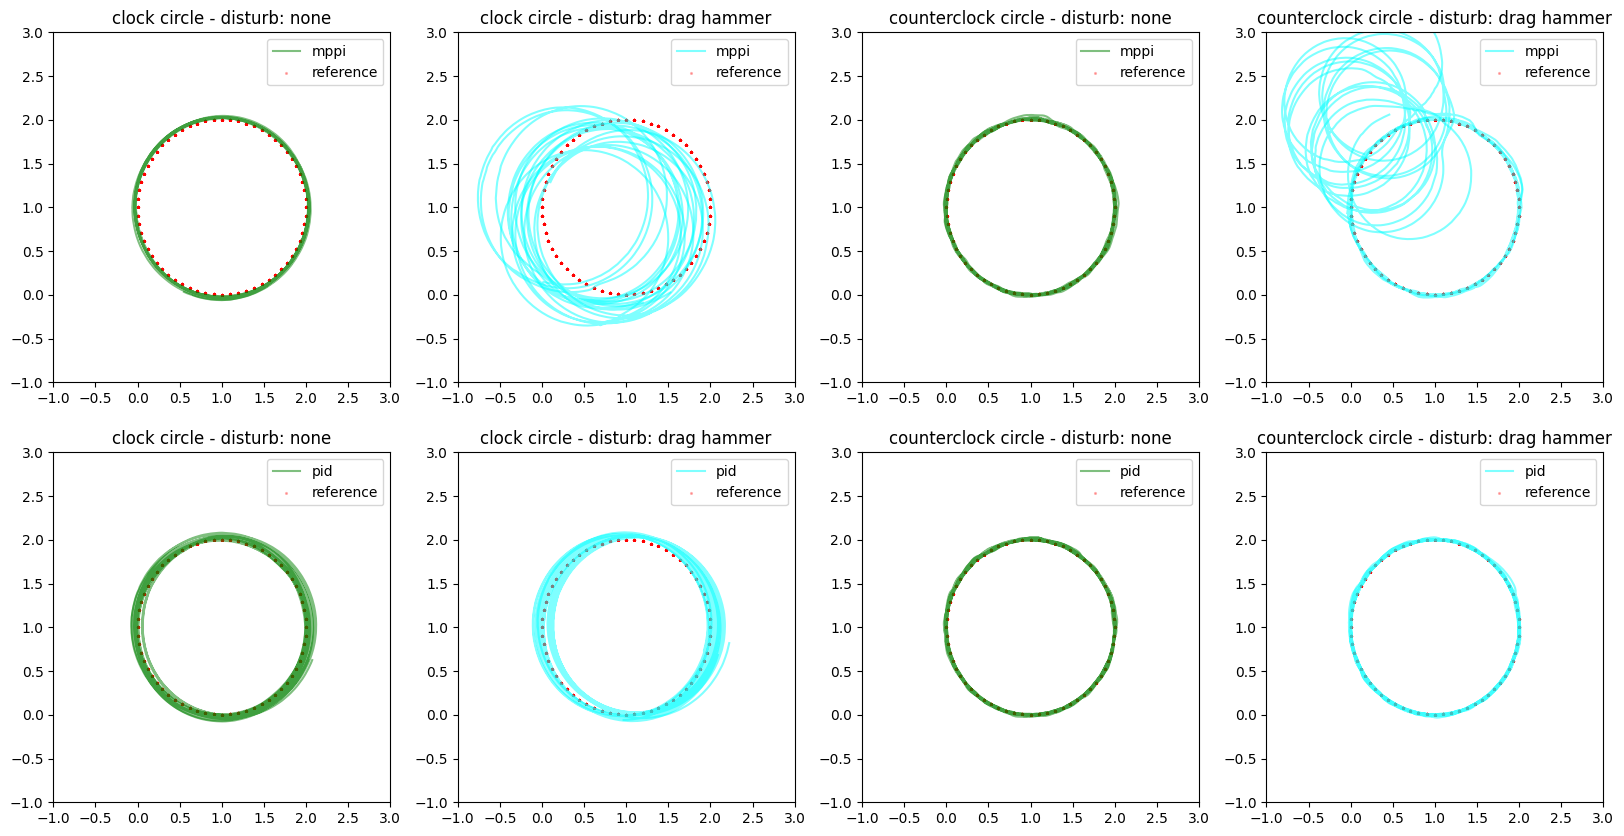

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for data in data_list:
    t_list, p_dict, yaw_dict, action_list = load_state(LOG_DIR+data['dir'], data['range'], orientation_provider="ORIENTATION_PROVIDOER")
    obs_np = p_dict['obs']
    with open(os.path.join(LOG_DIR+data['dir'], 'header.json')) as f:
        header_info = json.load(f)
    goal_list = np.array(header_info['goal_list'])
    fig_idx_x = 0 if data['controller'] == 'mppi' else 1
    fig_idx_y = 2 * (1 if 'counter' in data['name'] else 0) + (0 if 'none' in data['disturbance'] else 1)
    handles, labels = axs[fig_idx_x, fig_idx_y].get_legend_handles_labels()
    label1 = data['controller'] if data['controller'] not in labels else ''
    label2 = 'reference' if data['controller'] not in labels else ''
    
    
    axs[fig_idx_x, fig_idx_y].plot(obs_np[:, 0], obs_np[:, 1], alpha=0.5, color='green' if 'none' in data['disturbance'] else 'cyan', label=label1)
    
    axs[fig_idx_x, fig_idx_y].set_xlim([-1, 3])
    axs[fig_idx_x, fig_idx_y].set_ylim([-1, 3])
    axs[fig_idx_x, fig_idx_y].set_title(f"{data['name']} - disturb: {data['disturbance']}")
    axs[fig_idx_x, fig_idx_y].scatter(goal_list[:, 0], goal_list[:, 1], marker='*', c='red', s=2, alpha=0.3, label=label2)
    axs[fig_idx_x, fig_idx_y].legend()

In [5]:
result_err = dict(controller=[], abs_error=[], disturbance=[], trajectory=[])

for data in data_list:
    t_list, p_dict, yaw_dict, action_list = load_state(LOG_DIR+data['dir'], data['range'], orientation_provider="ORIENTATION_PROVIDOER")
    obs_np = p_dict['obs']
    with open(os.path.join(LOG_DIR+data['dir'], 'header.json')) as f:
        header_info = json.load(f)
    goal_list = np.array(header_info['goal_list'])
    fig_idx_x = 0 if data['controller'] == 'mppi' else 1
    fig_idx_y = 2 * (1 if 'counter' in data['name'] else 0) + (0 if 'none' in data['disturbance'] else 1)
    handles, labels = axs[fig_idx_x, fig_idx_y].get_legend_handles_labels()
    label1 = data['controller'] if data['controller'] not in labels else ''
    label2 = 'reference' if data['controller'] not in labels else ''
    
    radius_diff = np.abs(np.linalg.norm(obs_np[:, :2] - np.array([1,1]), axis=1) - 1)

    n_samples = radius_diff.shape[0]
    result_err['controller'] += [ data['controller'] ] * n_samples
    result_err['abs_error'] += radius_diff.tolist()
    result_err['disturbance'] += [ data['disturbance'] ] * n_samples
    result_err['trajectory'] += [ data['name'] ] * n_samples
df = pd.DataFrame(result_err)
# df_stats = df.groupby(['controller', 'disturbance', 'trajectory']).agg([np.mean, np.std])
# df_stats = df_stats['abs_error'].reset_index()

Output()

Output()

[INFO] In total 165 logs


Output()

[INFO] In total 139 logs


Output()

[INFO] In total 186 logs


Output()

[INFO] In total 180 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 115 logs


Output()

Output()

[INFO] In total 103 logs


Output()

[INFO] In total 120 logs


Output()

[INFO] In total 190 logs


Output()

[INFO] In total 90 logs


Output()

[INFO] In total 200 logs


Output()

[INFO] In total 200 logs


Output()

[INFO] In total 170 logs


[INFO] In total 180 logs


In [6]:
df

,controller,abs_error,disturbance,trajectory
0,mppi,0.033253,none,clock circle
1,mppi,0.032625,none,clock circle
2,mppi,0.031500,none,clock circle
3,mppi,0.030123,none,clock circle
4,mppi,0.028819,none,clock circle
...,...,...,...,...
29005,pid,0.006634,drag hammer,counterclock circle
29006,pid,0.006339,drag hammer,counterclock circle
29007,pid,0.004206,drag hammer,counterclock circle
29008,pid,0.002370,drag hammer,counterclock circle


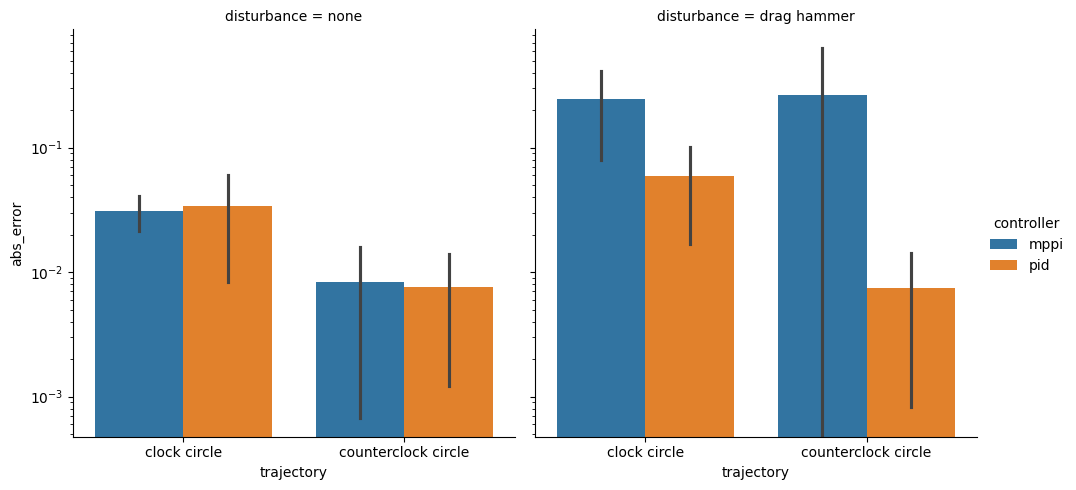

In [7]:
g = sns.catplot(data=df, x='trajectory',y='abs_error', hue='controller',errorbar="sd", col='disturbance',kind="bar")
g.set(yscale='log')